___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf

#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
import plotly.io as pio
pio.renderers.default = "notebook"

#To display the plots
# %matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix, average_precision_score

from sklearn.metrics import make_scorer

# RF model import edilecek
# XGBoost model import edilecek
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score, plot_confusion_matrix

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix

from sklearn.pipeline import Pipeline

# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)
sns.set_style("whitegrid", {'axes.grid' : False})

# To display maximum columns
pd.set_option('display.max_columns', None)

# To display maximum rows
pd.set_option('display.max_rows', 200)

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [2]:
# The style parameters control properties like the color of the background and whether a grid is enabled by default.
sns.set_style("whitegrid", {'axes.grid' : False})

params = {
'figure.figsize':(12,6),
'figure.titlesize':20,
'font.size': 15,
'axes.titlesize': 20,
'axes.labelsize': 15,
'xtick.labelsize': 15,
'ytick.labelsize': 15,
'legend.fontsize': 15,
'boxplot.showmeans': True,
'boxplot.meanprops.marker': 'o',
'boxplot.meanprops.markeredgecolor': 'k',
'boxplot.meanprops.markerfacecolor': 'r',
'boxplot.meanprops.markersize': 10.1,
'boxplot.medianprops.color': 'r',
'boxplot.medianprops.linewidth': 2.0,
}
plt.rcParams.update(params)
# plt.rcParams.update(plt.rcParamsDefault)
# print(plt.style.library)
# print(plt.rcParams['figure.figsize'])

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

primary MOS: A United States military occupation code

In [3]:
df_male = pd.read_csv("ANSUR II MALE Public.csv", encoding="unicode_escape")
df_male.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10027                             266            1467   
1      10032                             233            1395   
2      10033                             287            1430   
3      10092                             234            1347   
4      10093                             250            1585   

   acromionradialelength  anklecircumference  axillaheight  \
0                    337                 222          1347   
1                    326                 220          1293   
2                    341                 230          1327   
3                    310                 230          1239   
4                    372                 247          1478   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      253               202                401   
1                      245               193                394   
2                      256               196                427   
3                      262               199                401   
4                      267               224                435   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        369               274               493   
1                        338               257               479   
2                        408               261               544   
3                        359               262               518   
4                        356               263               524   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  71               319                        291   
1                  67               344                        320   
2                  75               345                        330   
3                  73               328                        309   
4                  80               340                        310   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 142                   979           240            882   
1                 135                   944           232            870   
2                 135                  1054           258            901   
3                 143                   991           242            821   
4                 138                  1029           275           1080   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                619                     509                373   
1                584                     468                357   
2                623                     506                412   
3                560                     437                395   
4                706                     567                425   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1535           291                1074         259         1292   
1             1471           269                1021         253         1244   
2             1501           288                1120         267         1288   
3             1423           296                1114         262         1205   
4             1684           304                1048         232         1452   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           877                    607                             351   
1           851                    615                             376   
2           854                    636                             359   
3           769                    590                             341   
4          1014                    682                             382   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          36         71             19              247               802   
1          33         62             18              232        

In [4]:
df_male.shape

(4082, 108)

In [5]:
df_female = pd.read_csv("ANSUR II FEMALE Public.csv", encoding="unicode_escape")
df_female.head()

SubjectId  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [6]:
df_female.shape

(1986, 108)

In [7]:
df_female.rename({"SubjectId":"subjectid"}, axis=1, inplace=True)

In [8]:
df_female.head()

subjectid  abdominalextensiondepthsitting  acromialheight  \
0      10037                             231            1282   
1      10038                             194            1379   
2      10042                             183            1369   
3      10043                             261            1356   
4      10051                             309            1303   

   acromionradialelength  anklecircumference  axillaheight  \
0                    301                 204          1180   
1                    320                 207          1292   
2                    329                 233          1271   
3                    306                 214          1250   
4                    308                 214          1210   

   balloffootcircumference  balloffootlength  biacromialbreadth  \
0                      222               177                373   
1                      225               178                372   
2                      237               196                397   
3                      240               188                384   
4                      217               182                378   

   bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
0                        315               263               466   
1                        272               250               430   
2                        300               276               450   
3                        364               276               484   
4                        320               336               525   

   bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
0                  65               338                        301   
1                  64               294                        270   
2                  69               309                        270   
3                  68               340                        294   
4                  67               300                        295   

   bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
0                 141                  1011           223            836   
1                 126                   893           186            900   
2                 128                   987           204            861   
3                 144                  1012           253            897   
4                 135                  1281           284            811   

   buttockkneelength  buttockpopliteallength  calfcircumference  \
0                587                     476                360   
1                583                     483                350   
2                583                     466                384   
3                599                     471                372   
4                607                     467                433   

   cervicaleheight  chestbreadth  chestcircumference  chestdepth  chestheight  \
0             1336           274                 922         245         1095   
1             1440           261                 839         206         1234   
2             1451           287                 874         223         1226   
3             1430           269                1008         285         1170   
4             1362           305                1089         290         1112   

   crotchheight  crotchlengthomphalion  crotchlengthposterioromphalion  \
0           759                    557                             310   
1           835                    549                             329   
2           821                    643                             374   
3           804                    640                             351   
4           726                    686                             356   

   earbreadth  earlength  earprotrusion  elbowrestheight  eyeheightsitting  \
0          35         65             16              220               713   
1          32         60             23              208        

In [9]:
df = pd.concat([df_male, df_female], ignore_index=True)

In [10]:
df.shape

(6068, 108)

## Explore Data

In [11]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 108 columns):
 #    Column                          Dtype 
---   ------                          ----- 
 0    subjectid                       int64 
 1    abdominalextensiondepthsitting  int64 
 2    acromialheight                  int64 
 3    acromionradialelength           int64 
 4    anklecircumference              int64 
 5    axillaheight                    int64 
 6    balloffootcircumference         int64 
 7    balloffootlength                int64 
 8    biacromialbreadth               int64 
 9    bicepscircumferenceflexed       int64 
 10   bicristalbreadth                int64 
 11   bideltoidbreadth                int64 
 12   bimalleolarbreadth              int64 
 13   bitragionchinarc                int64 
 14   bitragionsubmandibulararc       int64 
 15   bizygomaticbreadth              int64 
 16   buttockcircumference            int64 
 17   buttockdepth                   

In [12]:
df.isnull().sum()

subjectid                            0
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [13]:
# Drop Ethnicity feature

df.drop(columns="Ethnicity", inplace=True)

In [14]:
df.shape

(6068, 107)

In [15]:
df.duplicated().sum()

0

In [16]:
df.describe()

subjectid  abdominalextensiondepthsitting  acromialheight  \
count    6068.00                         6068.00         6068.00   
mean    20757.20                          246.47         1406.16   
std     13159.39                           37.40           79.09   
min     10027.00                          155.00         1115.00   
25%     14841.75                          219.00         1350.00   
50%     20063.50                          242.00         1410.00   
75%     27234.50                          271.00         1462.00   
max    920103.00                          451.00         1683.00   

       acromionradialelength  anklecircumference  axillaheight  \
count                6068.00             6068.00       6068.00   
mean                  327.37              224.89       1299.61   
std                    20.72               16.05         72.02   
min                   249.00              156.00       1038.00   
25%                   313.00              214.00       1249.00   
50%                   328.00              225.00       1302.00   
75%                   341.25              235.00       1349.00   
max                   393.00              293.00       1553.00   

       balloffootcircumference  balloffootlength  biacromialbreadth  \
count                  6068.00           6068.00            6068.00   
mean                    244.19            194.75             399.20   
std                      16.85             13.52              30.24   
min                     186.00            151.00             283.00   
25%                     232.00            185.00             376.00   
50%                     245.00            195.00             404.00   
75%                     256.00            204.00             421.00   
max                     306.00            245.00             489.00   

       bicepscircumferenceflexed  bicristalbreadth  bideltoidbreadth  \
count                    6068.00           6068.00           6068.00   
mean                      340.93            274.74            490.75   
std                        41.52             19.22             42.14   
min                       216.00            197.00            357.00   
25%                       311.00            262.00            460.00   
50%                       341.00            274.00            492.00   
75%                       370.00            288.00            520.00   
max                       490.00            362.00            637.00   

       bimalleolarbreadth  bitragionchinarc  bitragionsubmandibulararc  \
count             6068.00           6068.00                    6068.00   
mean                72.25            324.90                     306.64   
std                  5.34             17.09                      20.79   
min                 55.00            267.00                     245.00   
25%                 68.00            314.00                     292.00   
50%                 72.00            326.00                     307.00   
75%                 76.00            336.00                     321.00   
max                 91.00            385.00                     390.00   

       bizygomaticbreadth  buttockcircumference  buttockdepth  buttockheight  \
count             6068.00               6068.00       6068.00        6068.00   
mean               139.72               1020.08        241.62         870.15   
std                  7.31                 76.42         26.48          54.82   
min                116.00                737.00        168.00         656.00   
25%                135.00                968.00        222.00         832.00   
50%                140.00               1017.00        241.00         868.00   
75%                145.00               1068.00        259.00         906.25   
max                174.00               1341.00        349.00        1080.00   

       buttockkneelength  buttockpopliteallength  calfcircumference  \
count            6068.00                 6068.00   

In [17]:
df.describe(include="O")

Gender       Date Installation     Component                  Branch  \
count    6068       6068         6068          6068                    6068   
unique      2        253           12             3                       3   
top      Male  27-Feb-12  Camp Shelby  Regular Army  Combat Service Support   
freq     4082         45         1160          3140                    3174   

       PrimaryMOS SubjectsBirthLocation WritingPreference  
count        6068                  6068              6068  
unique        285                   152                 3  
top           11B            California        Right hand  
freq          671                   446              5350

In [18]:
df[["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
31                  3           112
4                   4           108
51                  1            99
8                   2            94
21                  2            51
31                  1            47
6                   6            37
23                  2            26
41                  4            26
28                  2            25
51                  5            24
6                   4            21
41                  1            19
251                 2            18
5                   5            16
61                  1            15
3                   1            13
25                  2            13
18                  1            12
61                  6            12
8                   1            11
                    4            10
21                  1             9
61                  4             8


In [19]:
df[df.SubjectNumericRace != df.DODRace].shape

(806, 107)

In [20]:
(df.SubjectNumericRace > 8).sum()/df.shape[0]

0.1051417270929466

In [21]:
df.SubjectNumericRace.value_counts().sort_index()

1        3561
2        1026
3         541
4         109
5          18
6          59
8         116
18         18
21         60
23         34
25         14
28         26
31        160
35          8
38          9
41         46
42          7
43          5
48          1
51        126
61         35
62          8
63          7
64          8
218         3
231         6
235         4
238         1
251        20
318         2
351        10
358         1
423         2
425         1
428         1
431         2
451         2
631         1
641         2
651         2
2351        2
2518        2
4251        1
42351       1
Name: SubjectNumericRace, dtype: int64

In [22]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

In [23]:
df.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace
Army National Guard  1         0.69
                     2         0.18
                     3         0.09
                     4         0.02
                     5         0.01
                     6         0.01
Army Reserve         1         0.52
                     2         0.24
                     3         0.19
                     4         0.04
                     6         0.01
                     5         0.00
Regular Army         1         0.58
                     2         0.24
                     3         0.12
                     4         0.04
                     6         0.01
                     5         0.01
                     8         0.00
Name: DODRace, dtype: float64

In [24]:
df[df.SubjectNumericRace == df.DODRace][["SubjectNumericRace","DODRace"]].value_counts()

SubjectNumericRace  DODRace
1                   1          3554
2                   2          1025
3                   3           522
4                   4           108
6                   6            37
5                   5            16
dtype: int64

In [25]:
# features will be dropped

# Date
# Installation
# subjectid
# Weightlbs = weightkg
# Heightin = stature
# SubjectNumericRace
# PrimaryMOS

df.drop(columns=["Date", "Installation", "subjectid", "Component", "Weightlbs", "Heightin", "SubjectNumericRace", "PrimaryMOS", "Branch"], inplace=True)


In [26]:
df["DODRace"] = df["DODRace"].map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

In [27]:
df.shape

(6068, 98)

In [28]:
df = df[(df["DODRace"] == "White") | (df["DODRace"] == "Black") |
                (df["DODRace"] == "Hispanic")]
df

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
0                                266            1467                    337   
1                                233            1395                    326   
2                                287            1430                    341   
3                                234            1347                    310   
4                                250            1585                    372   
...                              ...             ...                    ...   
6063                             285            1392                    335   
6064                             262            1324                    301   
6065                             260            1334                    318   
6066                             205            1293                    302   
6067                             238            1346                    308   

      anklecircumference  axillaheight  balloffootcircumference  \
0                    222          1347                      253   
1                    220          1293                      245   
2                    230          1327                      256   
3                    230          1239                      262   
4                    247          1478                      267   
...                  ...           ...                      ...   
6063                 223          1297                      252   
6064                 202          1204                      236   
6065                 213          1259                      234   
6066                 199          1207                      213   
6067                 210          1256                      236   

      balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
0                  202                401                        369   
1                  193                394                        338   
2                  196                427                        408   
3                  199                401                        359   
4                  224                435                        356   
...                ...                ...                        ...   
6063               196                368                        299   
6064               181                378                        294   
6065               183                363                        332   
6066               163                376                        276   
6067               188                361                        285   

      bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
0                  274               493                  71   
1                  257               479                  67   
2                  261               544                  75   
3                  262               518                  73   
4                  263               524                  80   
...                ...               ...                 ...   
6063               312               477                  72   
6064               287               468                  66   
6065               299               460                  70   
6066               280               426                  62   
6067               279               433                  71   

      bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
0                  319                        291                 142   
1                  344                        320                 135   
2                  345                        330                 135   
3                  328                        309                 143   
4                  340                        310                 138   
...                ...                        ...                 ...   
6063               306                        282                 136   
6064               309            

In [29]:
# dropping DODRace whose value counts are less than 500

(df.DODRace.value_counts() < 500)

White       False
Black       False
Hispanic    False
Name: DODRace, dtype: bool

In [30]:
df.shape

(5769, 98)

In [31]:
df.reset_index(drop=True, inplace=True)

<AxesSubplot:ylabel='DODRace'>

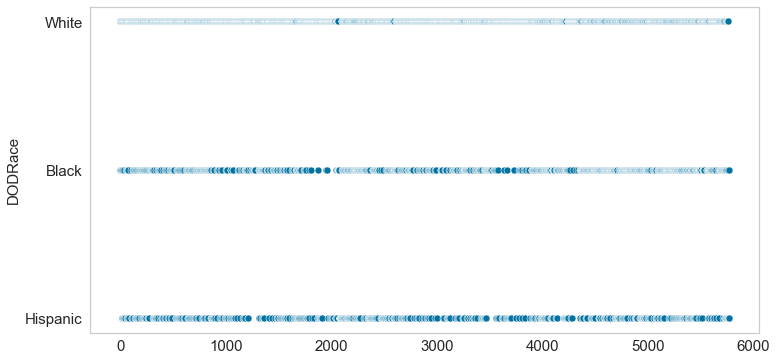

In [32]:
sns.scatterplot(data=df.DODRace)

In [33]:
df.corr()

abdominalextensiondepthsitting  \
abdominalextensiondepthsitting                            1.00   
acromialheight                                            0.35   
acromionradialelength                                     0.31   
anklecircumference                                        0.52   
axillaheight                                              0.28   
balloffootcircumference                                   0.46   
balloffootlength                                          0.33   
biacromialbreadth                                         0.42   
bicepscircumferenceflexed                                 0.69   
bicristalbreadth                                          0.51   
bideltoidbreadth                                          0.72   
bimalleolarbreadth                                        0.37   
bitragionchinarc                                          0.53   
bitragionsubmandibulararc                                 0.63   
bizygomaticbreadth                                        0.52   
buttockcircumference                                      0.74   
buttockdepth                                              0.84   
buttockheight                                             0.25   
buttockkneelength                                         0.48   
buttockpopliteallength                                    0.32   
calfcircumference                                         0.66   
cervicaleheight                                           0.34   
chestbreadth                                              0.63   
chestcircumference                                        0.83   
chestdepth                                                0.78   
chestheight                                               0.30   
crotchheight                                              0.19   
crotchlengthomphalion                                     0.46   
crotchlengthposterioromphalion                            0.20   
earbreadth                                                0.24   
earlength                                                 0.40   
earprotrusion                                             0.14   
elbowrestheight                                           0.26   
eyeheightsitting                                          0.28   
footbreadthhorizontal                                     0.44   
footlength                                                0.35   
forearmcenterofgriplength                                 0.35   
forearmcircumferenceflexed                                0.63   
forearmforearmbreadth                                     0.73   
forearmhandlength                                         0.31   
functionalleglength                                       0.42   
handbreadth                                               0.42   
handcircumference                                         0.46   
handlength                                                0.30   
headbreadth                                               0.36   
headcircumference                                         0.36   
headlength                                                0.33   
heelanklecircumference                                    0.50   
heelbreadth                                               0.44   
hipbreadth                                                0.60   
hipbreadthsitting                                         0.55   
iliocristaleheight                                        0.26   
interpupillarybreadth                                     0.26   
interscyei                                                0.60   
interscyeii                                               0.54   
kneeheightmidpatella                                      0.28   
kneeheightsitting                                         0.35   
lateralfemoralepicondyleheight                            0.22   
lateralmalleolusheight                                    0.35   
lowerthighcircumference                                   0.67   
menton

In [34]:
def check_multicolinarity(data):
    ''' data = numeric list like object or pd.Dataframe'''
    def color_red(val):
        color = ('red' if abs(val) >= 0.9 and val < 1 else 'black')
        return f'color: {color}'

    df = pd.DataFrame(data)
    df_corr = df.corr().applymap(lambda x: x if abs(x)>=0.9 and x<1 else np.NaN).dropna(how='all').dropna(how='all', axis=1)
    
    print(f'Multicolinarity Data', df_corr.shape)
    return df_corr.style.applymap(color_red)

check_multicolinarity(df)

Multicolinarity Data (59, 59)


In [35]:
df.corr()[(abs(df.corr())>= 0.9) & (abs(df.corr()) < 1)].any().any()

True

In [36]:
df.shape

(5769, 98)

In [37]:
df.corr().unstack()

abdominalextensiondepthsitting  abdominalextensiondepthsitting    1.00
                                acromialheight                    0.35
                                acromionradialelength             0.31
                                anklecircumference                0.52
                                axillaheight                      0.28
                                                                  ... 
Age                             waistheightomphalion             -0.03
                                weightkg                          0.23
                                wristcircumference                0.15
                                wristheight                       0.11
                                Age                               1.00
Length: 8836, dtype: float64

In [38]:
# multicol modele bırakılıyor

df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr')

Corr
abdominalextensiondepthsitting abdominalextensiondepthsitting  1.00
cervicaleheight                stature                         0.99
stature                        suprasternaleheight             0.99
cervicaleheight                suprasternaleheight             0.99
acromialheight                 axillaheight                    0.99
...                                                             ...
shoulderlength                 Age                             0.00
elbowrestheight                shoulderlength                  0.00
                               lateralfemoralepicondyleheight  0.00
buttockheight                  elbowrestheight                -0.00
hipbreadthsitting              lateralmalleolusheight         -0.00

[4372 rows x 1 columns]

In [39]:
df.corr().unstack().drop_duplicates().sort_values(key=abs, ascending=False).to_frame('Corr').head(20)

Corr
abdominalextensiondepthsitting abdominalextensiondepthsitting  1.00
cervicaleheight                stature                         0.99
stature                        suprasternaleheight             0.99
cervicaleheight                suprasternaleheight             0.99
acromialheight                 axillaheight                    0.99
                               suprasternaleheight             0.98
                               cervicaleheight                 0.98
eyeheightsitting               sittingheight                   0.98
axillaheight                   suprasternaleheight             0.98
acromialheight                 stature                         0.98
axillaheight                   cervicaleheight                 0.98
                               stature                         0.98
neckcircumference              neckcircumferencebase           0.97
acromionradialelength          shoulderelbowlength             0.97
chestheight                    suprasternaleheight             0.97
cervicaleheight                chestheight                     0.97
buttockheight                  trochanterionheight             0.97
chestheight                    stature                         0.96
iliocristaleheight             tenthribheight                  0.96
forearmcenterofgriplength      forearmhandlength               0.96

In [40]:
df_numeric = df.select_dtypes('number')
df_object = df.select_dtypes('O')

df_numeric.shape, df_object.shape

((5769, 94), (5769, 4))

In [41]:
# #histplot için:
# fig = df_numeric.hist(
# figsize=(16, 50), layout=(int(np.ceil(len(df_numeric.columns)/4)), 4),
# bins=50, color="darkcyan", 
# edgecolor="black", 
# xlabelsize=14, ylabelsize=14, 
# alpha=0.5, xrot=45
# )
# plt.tight_layout()
# plt.show()

In [42]:
# fig = plt.figure(figsize=(15, 30))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.15
# )
# for i, col in enumerate(df_numeric.columns):
#     plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
#     sns.boxplot(y=col, data=df_numeric);

In [43]:
# fig = plt.figure(figsize=(15,50))
# plt.subplots_adjust(
#     left=0.1, right=0.9,
#     top=1.9, bottom=0.1,
#     wspace=0.4, hspace=0.2
# )
# for i, col in enumerate(df_numeric.columns):
#     plt.subplot(int(np.ceil(len(df_numeric.columns)/5)), 5, i+1)
#     sns.regplot(x=col, y="DODRace", data=df_numeric, scatter_kws={"s": 18});

In [44]:
# fig, axes = plt.subplots(int(np.ceil(len(df_object.columns)/3)), 3, figsize=(15, 12))

# for i, ax in enumerate(fig.axes):
#     # plot barplot of each feature skip target
#     if i < len(df_object.columns) - 1:
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
#         g = sns.countplot(x=df_object.columns[i], alpha=0.7, data=df_object, ax=ax, palette = "Set1")
#         g.bar_label(g.containers[0])
# fig.tight_layout();

In [45]:
# df_object= df.select_dtypes(include="O")
# fig, axes = plt.subplots(1, 3, figsize=(12, 5))
# for i, ax in enumerate(fig.axes):
#     # plot the variation of price in each feature skip target
#     if i < len(df_object.columns) - 1:
#         ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
#         sns.boxplot(x=df_object.columns[i], y=df["DODRace"], data=df_object, ax=ax, palette="Spectral_r")
# fig.tight_layout()

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

## Train-Test split

In [46]:
df.shape

(5769, 98)

In [47]:
X = df.drop(columns="DODRace", axis=1)
y = df["DODRace"]

In [48]:
cat = X.select_dtypes("object").columns
cat 

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [50]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4615, 97), (1154, 97), (4615,), (1154,))

## OneHotEncoding operations

In [51]:
from sklearn.preprocessing import OneHotEncoder

### OneHotEncoder for X_train and X_test

In [52]:
#conda install -c conda-forge scikit-learn

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [54]:
X_train.shape, X_test.shape

((4615, 97), (1154, 97))

# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [55]:

from sklearn.pipeline import Pipeline
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

pipe_log_model = Pipeline(steps=operations)

In [56]:
pipe_log_model.fit(X_train,y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [57]:
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [58]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.61
test_precision_Hispanic   0.50
test_recall_Hispanic      0.78
dtype: float64

In [59]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    plot_confusion_matrix(model, X_test, y_test);

    print("\n"*3, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    plot_confusion_matrix(model, X_train, y_train);

TEST REPORT
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



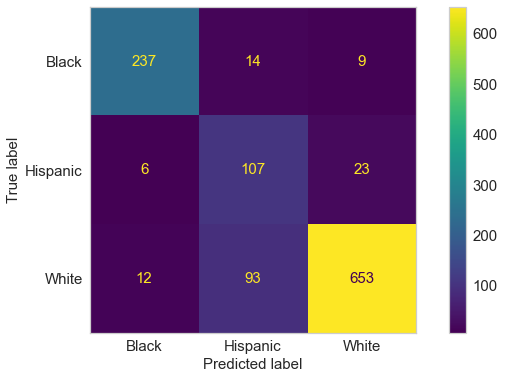

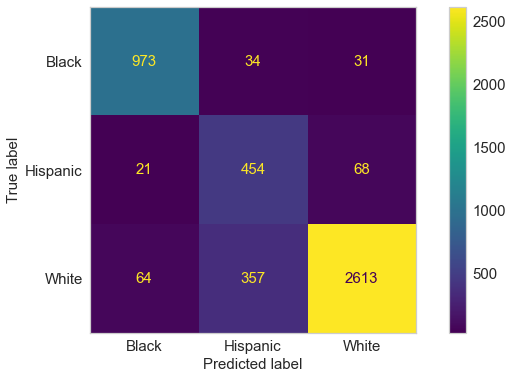

In [60]:
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

### Logistic Model Cross Validation

In [61]:
model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.61
test_precision_Hispanic   0.50
test_recall_Hispanic      0.78
dtype: float64

### Logistic Model GridsearchCV

In [62]:
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [63]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [64]:
operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [65]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=101))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [66]:
log_model_grid.best_estimator_

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(C=1, class_weight='balanced',
                                    max_iter=10000, random_state=101))])

In [67]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [68]:
log_model_grid.best_score_

0.7714746856948691

TEST REPORT
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.88      0.88      4615



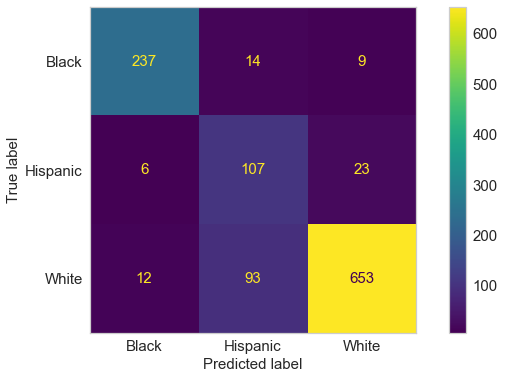

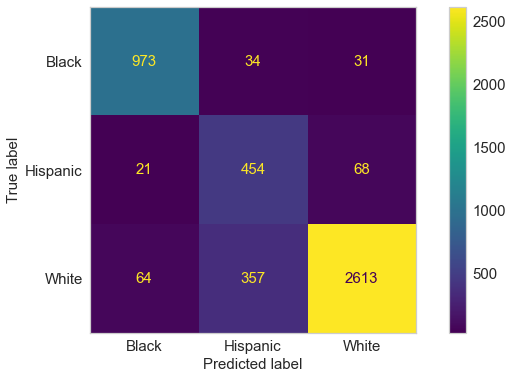

In [69]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curve

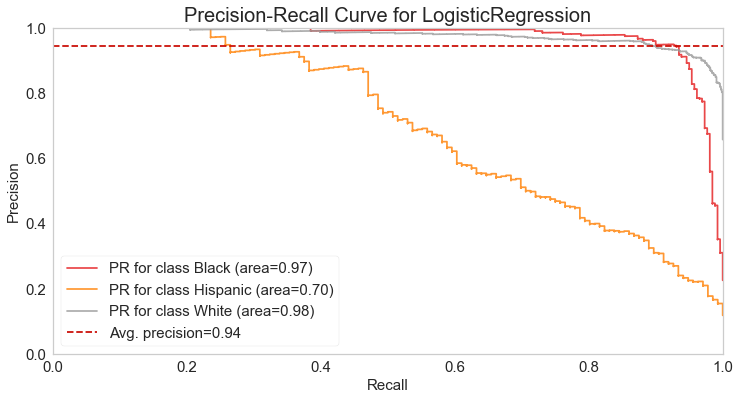

In [70]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("OneHotEncoder", column_trans), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [71]:
viz.score_#["Hispanic"]

{'Black': 0.9724126416144255,
 'Hispanic': 0.7035172344727841,
 'White': 0.9759438150969509,
 'micro': 0.9423073629812334}

In [72]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 2. SVC

### Vanilla SVC model 

In [73]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

pipe_svc_model = Pipeline(steps=operations_svc)

TEST REPORT
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.46      0.78      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



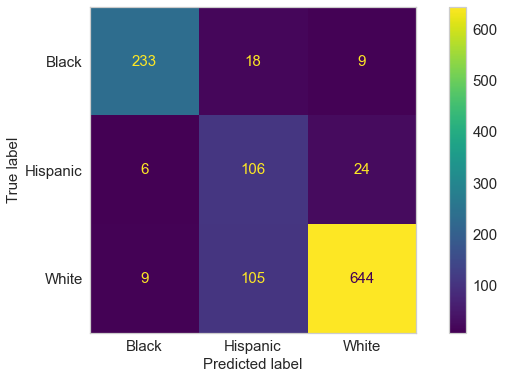

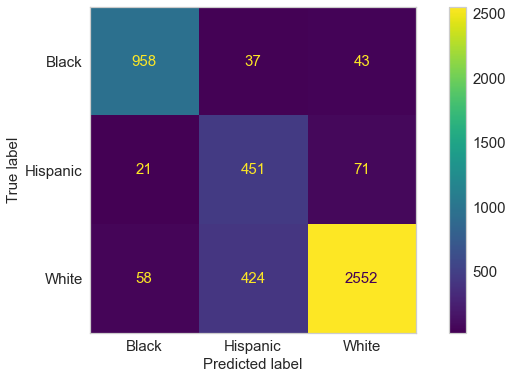

In [74]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

In [75]:
y_pred_test = pipe_svc_model.predict(X_test)
y_pred_train = pipe_svc_model.predict(X_train)

TEST REPORT
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.46      0.78      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.83      0.62       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.90      0.86      0.87      4615



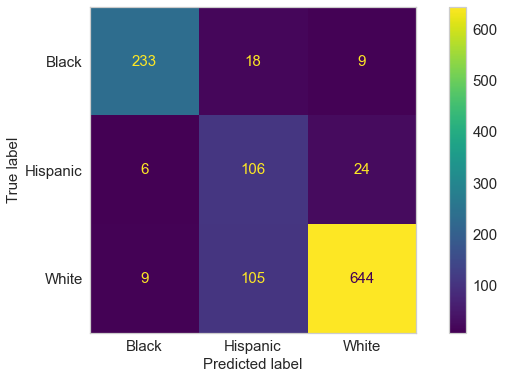

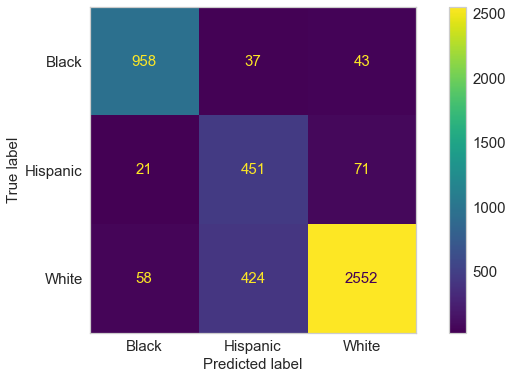

In [76]:
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

### SVC Model Cross validation

In [77]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.58
test_precision_Hispanic   0.46
test_recall_Hispanic      0.77
dtype: float64

###  SVC Model GridsearchCV

In [78]:
param_grid = {
    'svc__C': [1,2],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [79]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(estimator=Pipeline(steps=[('OneHotEncoder',
                                        ColumnTransformer(remainder=MinMaxScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=101))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [80]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [81]:
svm_model_grid.best_score_

0.7752123683316345

TEST REPORT
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93       260
    Hispanic       0.49      0.79      0.60       136
       White       0.96      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.80      0.85      0.81      1154
weighted avg       0.90      0.86      0.88      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.85      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.91      0.88      0.88      4615



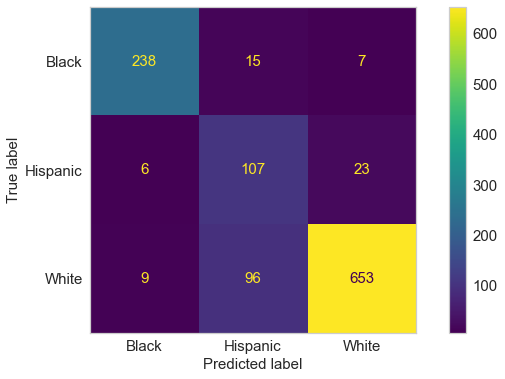

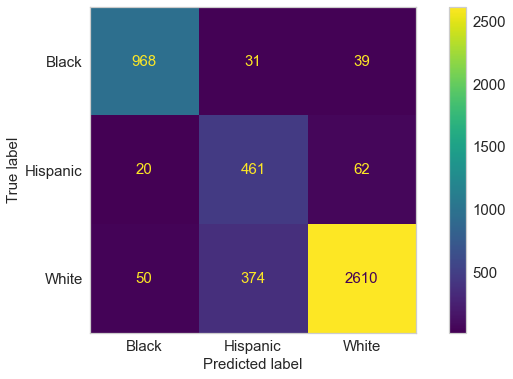

In [82]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curve

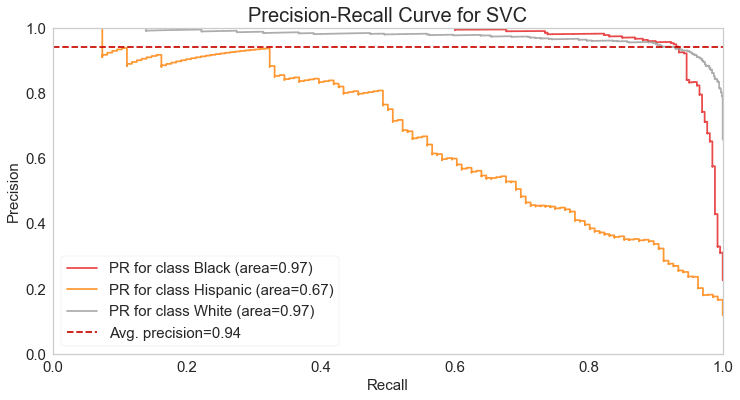

In [83]:
operations_svc = [("OneHotEncoder", column_trans), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]

model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### Evaluating ROC-AUC Curves

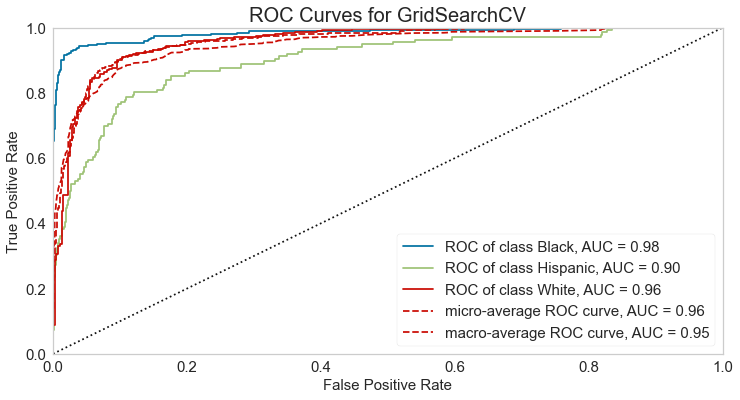

In [84]:
# for grid model

from yellowbrick.classifier import ROCAUC
model = svm_model_grid
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

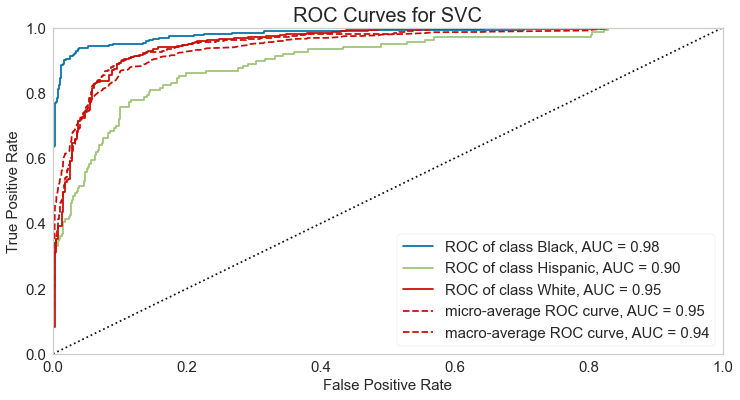

In [85]:
# for svc_pipe_model with default hyperparameters

from yellowbrick.classifier import ROCAUC
model = pipe_svc_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

In [86]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 3. RF

In [87]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

### Vanilla RF Model

In [88]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier


operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

pipe_model_rf = Pipeline(steps=operations_rf)

pipe_model_rf.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.92      0.70      0.79       260
    Hispanic       1.00      0.01      0.03       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.90      0.57      0.57      1154
weighted avg       0.84      0.81      0.76      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



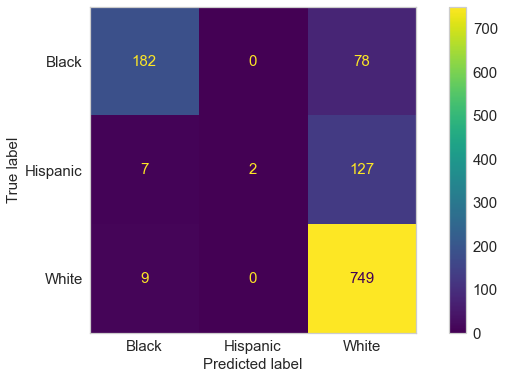

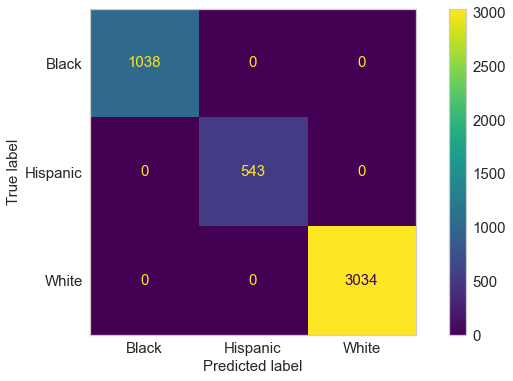

In [89]:
eval_metric(pipe_model_rf, X_train, y_train, X_test, y_test)

### RF Model Cross validation

In [90]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.09
test_precision_Hispanic   0.80
test_recall_Hispanic      0.05
dtype: float64

### RF Model GridsearchCV

In [91]:
param_grid = {'RF_model__n_estimators':[400,500],
             'RF_model__max_depth':[2,3]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]

In [92]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                                                    random_state=101))]

model = Pipeline(steps=operations_rf)
rf_grid_model = GridSearchCV(model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)
             


In [93]:
rf_grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                                       ('RF_model',
                                        RandomForestClassifier(class_weight='balanced',
                                                               random_state=101))]),
             n_jobs=-1,
             param_grid={'RF_model__max_depth': [2, 3],
                         'RF_model__n_estimators': [400, 500]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [94]:
rf_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('RF_model',
                 RandomForestClassifier(class_weight='balanced', max_depth=2,
                                        n_estimators=400, random_state=101))])

In [95]:
rf_grid_model.best_params_

{'RF_model__max_depth': 2, 'RF_model__n_estimators': 400}

In [96]:
rf_grid_model.best_score_

0.5966190961603807

TEST REPORT
              precision    recall  f1-score   support

       Black       0.69      0.68      0.69       260
    Hispanic       0.19      0.62      0.29       136
       White       0.86      0.51      0.64       758

    accuracy                           0.57      1154
   macro avg       0.58      0.61      0.54      1154
weighted avg       0.74      0.57      0.61      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.72      0.69      0.70      1038
    Hispanic       0.21      0.65      0.32       543
       White       0.86      0.56      0.68      3034

    accuracy                           0.60      4615
   macro avg       0.60      0.63      0.57      4615
weighted avg       0.75      0.60      0.64      4615



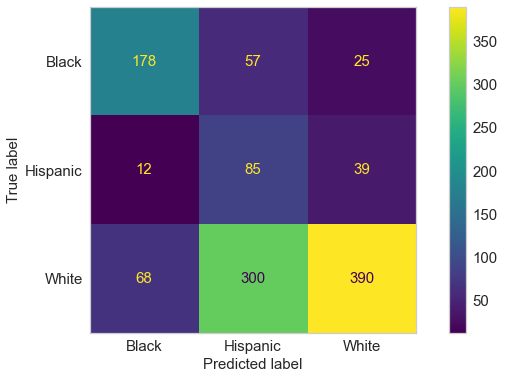

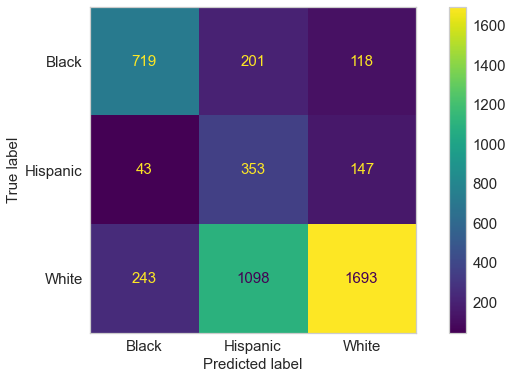

In [97]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curve

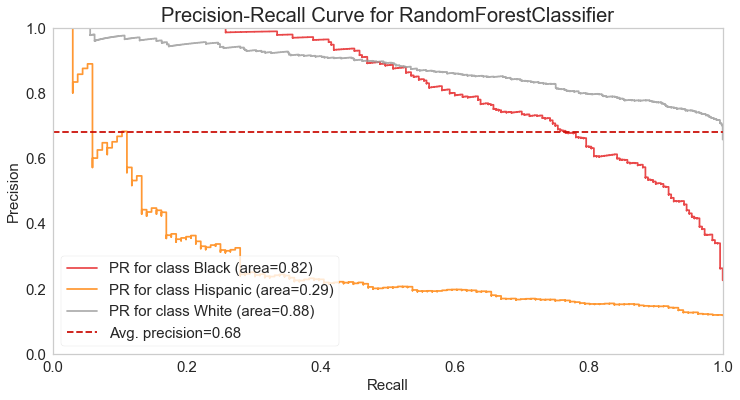

In [98]:
operations_rf = [("OrdinalEncoder", column_trans), ("RF_model", RandomForestClassifier(class_weight="balanced", 
                                                    max_depth=2, n_estimators=400, random_state=101))]

model = Pipeline(steps=operations_rf)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

### Evaluating ROC Curves and AUC

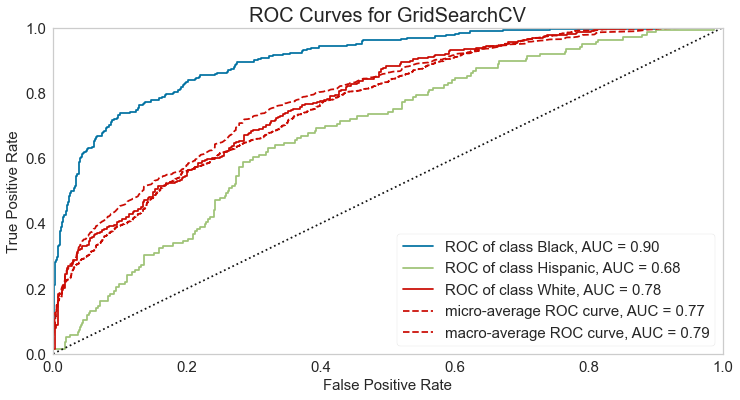

In [99]:
# for grid model

from yellowbrick.classifier import ROCAUC
model = rf_grid_model
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

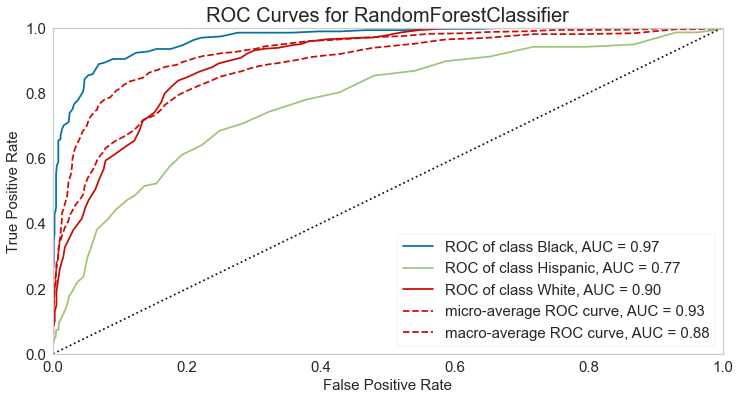

In [100]:
# for pipe_model_rf with default hyperparameters

from yellowbrick.classifier import ROCAUC
model = pipe_model_rf
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();

In [101]:
y_pred = rf_grid_model.predict(X_test)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [102]:
from xgboost import XGBClassifier

operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

pipe_model_xgb = Pipeline(steps=operations_xgb)

pipe_model_xgb.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

In [103]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [104]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0   
Black     1.48    1038
Hispanic  2.83     543
White     0.51    3034
Name: 0, dtype: int64

In [105]:
pipe_model_xgb.fit(X_train,y_train, XGB_model__sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(objective='multi:softprob', random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.86      0.87      0.86       260
    Hispanic       0.45      0.67      0.54       136
       White       0.93      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.74      0.79      0.76      1154
weighted avg       0.85      0.83      0.84      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92      1038
    Hispanic       0.58      0.86      0.69       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.89      4615



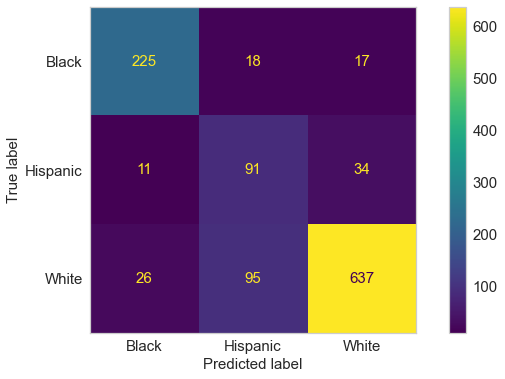

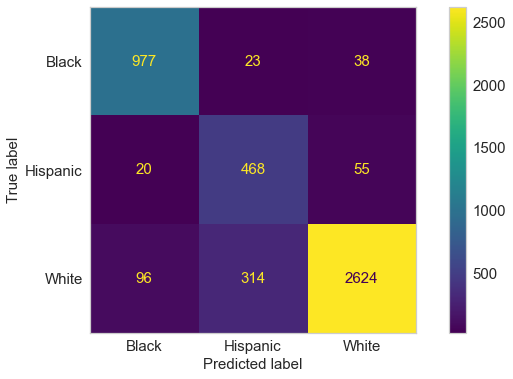

In [106]:
eval_metric(pipe_model_xgb, X_train, y_train, X_test, y_test)

### XGBoost Cross Validation

In [107]:
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.metrics import fbeta_score, make_scorer

operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 5,
                        fit_params={"XGB_model__sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.49
test_precision_Hispanic   0.42
test_recall_Hispanic      0.59
dtype: float64

### XGBoost Model GridsearchCV

In [108]:
param_grid = {"XGB_model__n_estimators":[50, 100],
              'XGB_model__max_depth':[1,2],
              "XGB_model__learning_rate": [0.1, 0.3],
              "XGB_model__subsample":[0.8, 1],
              "XGB_model__colsample_bytree":[0.8, 1]}

In [109]:
operations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(random_state=101))]

model = Pipeline(steps=operations_xgb)

xgb_grid_model = GridSearchCV(model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [110]:
xgb_grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('XGB_model',
                 XGBClassifier(colsample_bytree=0.8, learning_rate=0.3,
                               max_depth=1, objective='multi:softprob',
                               random_state=101))])

In [111]:
xgb_grid_model.best_params_

{'XGB_model__colsample_bytree': 0.8,
 'XGB_model__learning_rate': 0.3,
 'XGB_model__max_depth': 1,
 'XGB_model__n_estimators': 100,
 'XGB_model__subsample': 1}

In [112]:
xgb_grid_model.best_score_

0.6222901800883452

TEST REPORT
              precision    recall  f1-score   support

       Black       0.81      0.85      0.83       260
    Hispanic       0.34      0.68      0.45       136
       White       0.92      0.74      0.82       758

    accuracy                           0.76      1154
   macro avg       0.69      0.76      0.70      1154
weighted avg       0.83      0.76      0.78      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.83      0.87      0.85      1038
    Hispanic       0.40      0.72      0.51       543
       White       0.93      0.78      0.85      3034

    accuracy                           0.79      4615
   macro avg       0.72      0.79      0.74      4615
weighted avg       0.85      0.79      0.81      4615



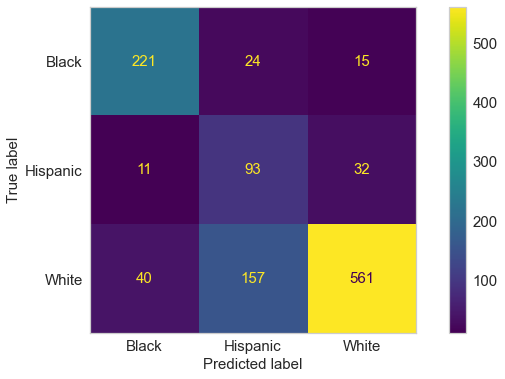

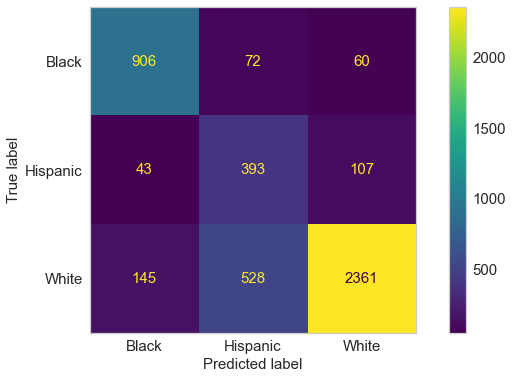

In [113]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

### Evaluating Precision-Recall Curve

In [114]:
#!pip install scikit-plot

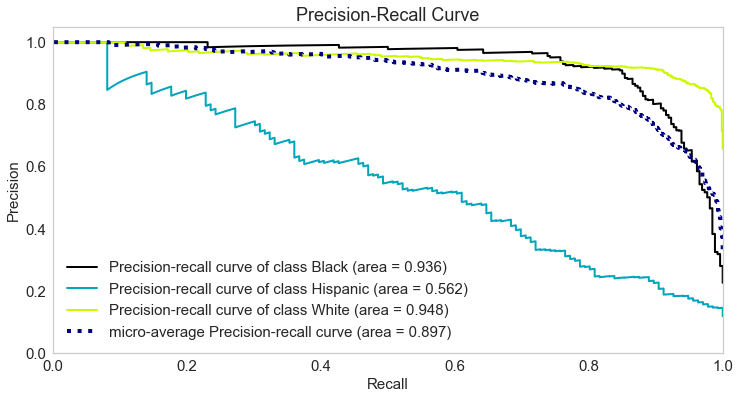

In [115]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


perations_xgb = [("OrdinalEncoder", column_trans), ("XGB_model", XGBClassifier(learning_rate=0.3, max_depth=1,
                            random_state=101, subsample=0.8))]

model = Pipeline(steps=operations_xgb)

model.fit(X_train, y_train, XGB_model__sample_weight=classes_weights)

y_pred_proba = model.predict_proba(X_test)
#y_pred = model.predict(X_test)
#Plot metrics 
#plot_roc(y_test, y_score)
#plt.show()
    
plot_precision_recall(y_test, y_pred_proba)
plt.show()

### Evaluating ROC AUC Curves

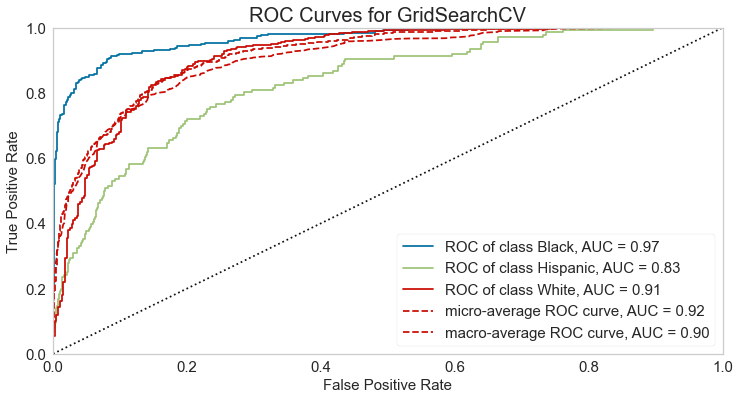

In [116]:
from yellowbrick.classifier import ROCAUC
model = xgb_grid_model

visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show(); 

In [117]:
y_test_dummies = pd.get_dummies(y_test, drop_first=False).values

average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])

0.5623238265533392

In [118]:
y_pred = xgb_grid_model.predict(X_test)

xgb_AP = average_precision_score(y_test_dummies[:, 1], y_pred_proba[:, 1])
xgb_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

# Comparing Models

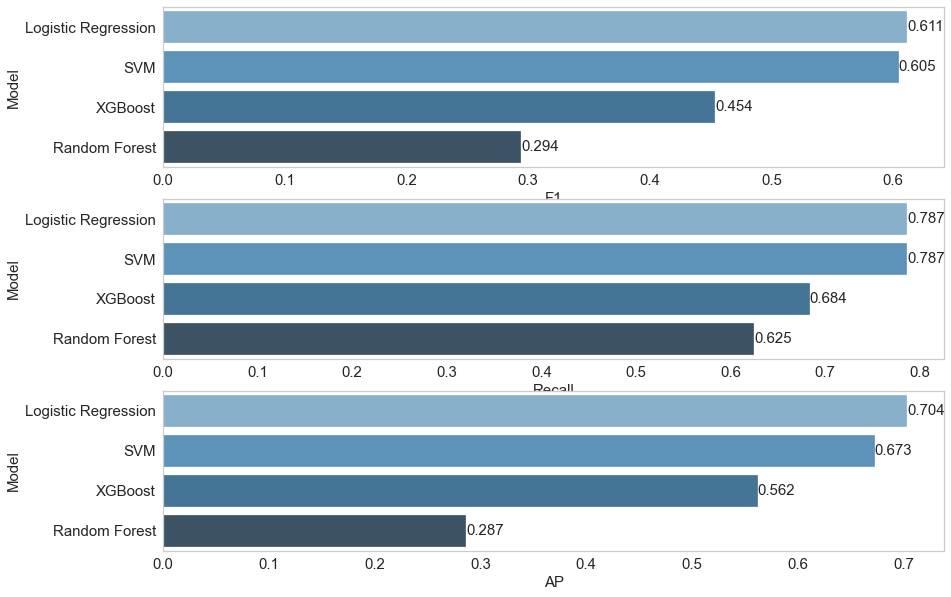

In [119]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

SMOTE(Synthetic Minority Oversampling Technique)

##  Smote implement

In [120]:
#!pip install imblearn

In [121]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [122]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [123]:
X_train_ohe = column_trans.fit_transform(X_train)

## SVC Over/Under Sampling

In [124]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train_ohe, y_train)

In [125]:
X_over.shape

(9102, 226)

In [126]:
y_over.value_counts()

White       3034
Black       3034
Hispanic    3034
Name: DODRace, dtype: int64

In [127]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train_ohe, y_train)

In [128]:
X_under.shape

(1629, 226)

In [129]:
y_under.value_counts()

Black       543
Hispanic    543
White       543
Name: DODRace, dtype: int64

In [130]:
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [131]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train_ohe, y_train)

In [132]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [133]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [134]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train_ohe, y_train) #X_resampled_over, y_resampled_over

In [135]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [136]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train_ohe, y_train)

In [137]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [138]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## Logistic Regression Over/Under Sampling

In [139]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

In [140]:
operations = [("OneHotEncoder",column_trans), ('o', over), ('u', under), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))] #("scaler", MinMaxScaler())

In [141]:
smote_pipeline = imbpipeline(steps=operations)

In [142]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.96      0.91      0.93       260
    Hispanic       0.64      0.66      0.65       136
       White       0.93      0.94      0.94       758

    accuracy                           0.90      1154
   macro avg       0.84      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.95      0.92      0.93      1038
    Hispanic       0.70      0.70      0.70       543
       White       0.93      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.85      0.86      4615
weighted avg       0.91      0.91      0.91      4615



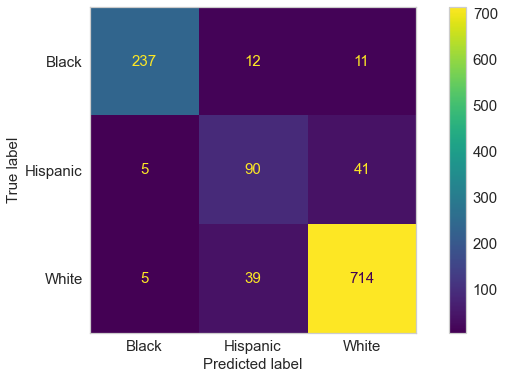

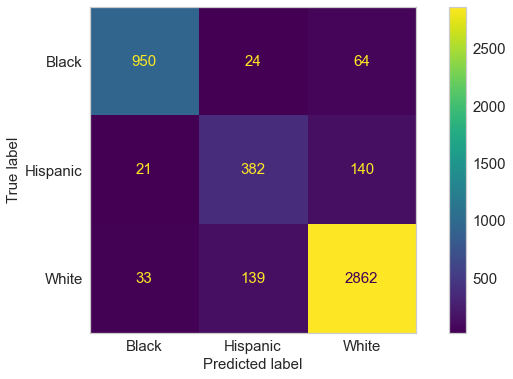

In [143]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

In [144]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.65
test_precision_Hispanic   0.65
test_recall_Hispanic      0.66
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [145]:
# !pip install shap

In [146]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

X_train_trans = column_trans_shap.fit_transform(X_train)
X_test_trans = column_trans_shap.transform(X_test)

model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

model_shap.fit(X_train_trans, y_train)


LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [147]:
X_train_trans

array([[1.        , 0.        , 0.        , ..., 0.2826087 , 0.45794393,
        0.34146341],
       [1.        , 0.        , 0.        , ..., 0.47826087, 0.49221184,
        0.43902439],
       [1.        , 0.        , 0.        , ..., 0.25      , 0.43613707,
        0.58536585],
       ...,
       [0.        , 1.        , 0.        , ..., 0.67391304, 0.72897196,
        0.51219512],
       [0.        , 1.        , 0.        , ..., 0.40217391, 0.42367601,
        0.29268293],
       [1.        , 0.        , 0.        , ..., 0.38043478, 0.30529595,
        0.29268293]])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.92      0.91      0.91       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.92      0.93      0.92      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



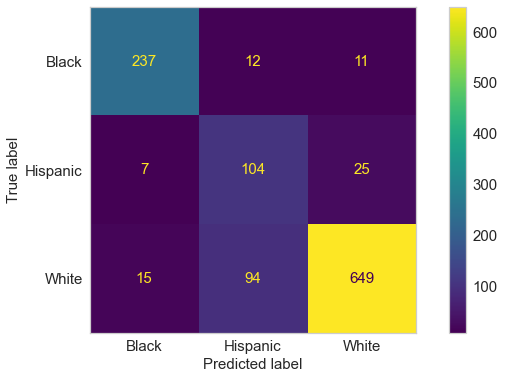

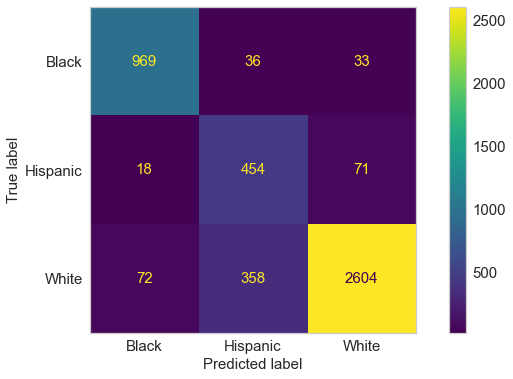

In [148]:
eval_metric(model_shap, X_train_trans, y_train, X_test_trans, y_test)

In [149]:
model = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')

scores = cross_validate(model, X_train_trans, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_Hispanic          0.60
test_precision_Hispanic   0.49
test_recall_Hispanic      0.76
dtype: float64

In [150]:
X_train.columns

Index(['abdominalextensiondepthsitting', 'acromialheight',
       'acromionradialelength', 'anklecircumference', 'axillaheight',
       'balloffootcircumference', 'balloffootlength', 'biacromialbreadth',
       'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth',
       'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth',
       'buttockheight', 'buttockkneelength', 'buttockpopliteallength',
       'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight',
       'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth',
       'earlength', 'earprotrusion', 'elbowrestheight', 'eyeheightsitting',
       'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength',
       'forearmcircumferenceflexed', 'forearmforearmbreadth',
       'forearmhandlength', 'functionalleglength', 'handbreadth',
      

In [151]:
features = column_trans_shap.get_feature_names_out(X_train.columns)
features

array(['onehotencoder__Gender_Female', 'onehotencoder__Gender_Male',
       'onehotencoder__SubjectsBirthLocation_Alabama',
       'onehotencoder__SubjectsBirthLocation_Alaska',
       'onehotencoder__SubjectsBirthLocation_Antigua and Barbuda',
       'onehotencoder__SubjectsBirthLocation_Argentina',
       'onehotencoder__SubjectsBirthLocation_Arizona',
       'onehotencoder__SubjectsBirthLocation_Arkansas',
       'onehotencoder__SubjectsBirthLocation_Bahamas',
       'onehotencoder__SubjectsBirthLocation_Barbados',
       'onehotencoder__SubjectsBirthLocation_Belarus',
       'onehotencoder__SubjectsBirthLocation_Belgium',
       'onehotencoder__SubjectsBirthLocation_Belize',
       'onehotencoder__SubjectsBirthLocation_Bermuda',
       'onehotencoder__SubjectsBirthLocation_Bolivia',
       'onehotencoder__SubjectsBirthLocation_Bosnia and Herzegovina',
       'onehotencoder__SubjectsBirthLocation_British Virgin Islands',
       'onehotencoder__SubjectsBirthLocation_Bulgaria',
      

## Shap values for all data

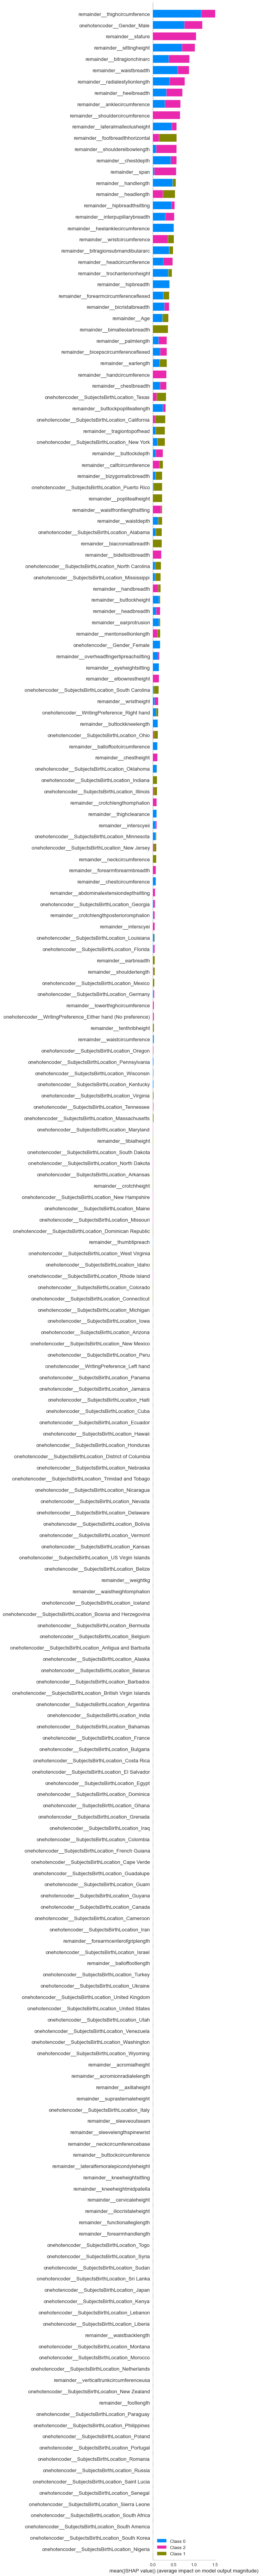

In [156]:
import shap

explainer = shap.LinearExplainer(model_shap, X_train_trans) #LinearExplainer

shap_values = explainer.shap_values(X_test_trans)

shap.summary_plot(shap_values, X_test_trans, max_display=300,feature_names = features, plot_type="bar")

In [157]:
shap_values

[array([[-0.13927627, -0.60067316, -0.04752575, ...,  0.        ,
         -0.0918622 ,  0.54960739],
        [-0.13927627, -0.60067316, -0.04752575, ..., -0.        ,
         -0.00555433,  0.44751314],
        [ 0.24760225,  1.06786339, -0.04752575, ..., -0.        ,
          0.00697423, -0.06295812],
        ...,
        [ 0.24760225,  1.06786339,  1.14061792, ..., -0.        ,
          0.09049798,  0.48154455],
        [ 0.24760225,  1.06786339, -0.04752575, ..., -0.        ,
          0.07379323, -0.40327229],
        [-0.13927627, -0.60067316, -0.04752575, ...,  0.        ,
         -0.0584527 ,  0.71976447]]),
 array([[-0.00000000e+00,  0.00000000e+00,  8.46246240e-02, ...,
         -1.79302636e-01,  0.00000000e+00, -3.16801719e-01],
        [-0.00000000e+00,  0.00000000e+00,  8.46246240e-02, ...,
          6.15336783e-02,  0.00000000e+00, -2.57953103e-01],
        [ 0.00000000e+00, -0.00000000e+00,  8.46246240e-02, ...,
          1.93993651e-01, -0.00000000e+00,  3.62899802e-

In [158]:
print(shap_values[0].shape)

(1154, 226)


## SHAP for Feature Selection

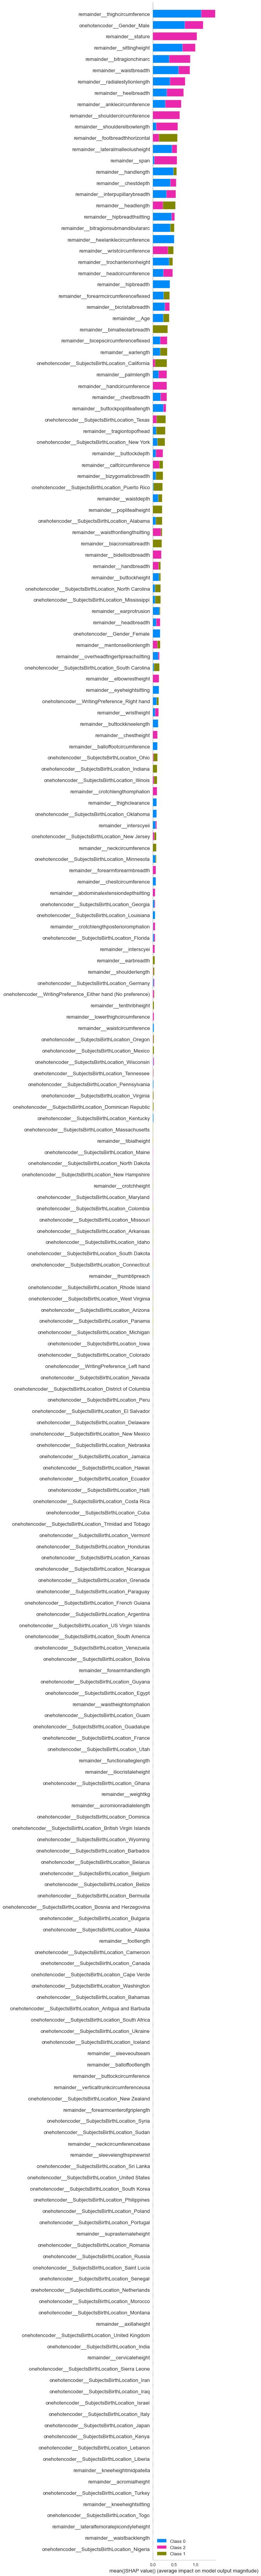

In [160]:
explainer = shap.Explainer(model_shap, X_train_trans)

shap_values = explainer.shap_values(X_train_trans)

shap.summary_plot(shap_values, X_train_trans, max_display=300,feature_names = features)

In [161]:
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [162]:
X2 = X[hispanic]
X2.head()

SubjectsBirthLocation  handlength  forearmcircumferenceflexed  headlength  \
0          North Dakota         193                         299         206   
1              New York         195                         289         201   
2              New York         203                         357         202   
3             Wisconsin         194                         318         199   
4        North Carolina         218                         324         197   

   bitragionsubmandibulararc  footbreadthhorizontal  bimalleolarbreadth  \
0                        291                    101                  71   
1                        320                     98                  67   
2                        330                    103                  75   
3                        309                    106                  73   
4                        310                    111                  80   

   poplitealheight  waistdepth WritingPreference  tragiontopofhead  \
0              437         240        Right hand               140   
1              417         225         Left hand               120   
2              431         255         Left hand               125   
3              393         205        Right hand               127   
4              523         214        Right hand               122   

   bideltoidbreadth  neckcircumferencebase  biacromialbreadth  buttockheight  \
0               493                    436                401            882   
1               479                    420                394            870   
2               544                    434                427            901   
3               518                    446                401            821   
4               524                    430                435           1080   

   buttockkneelength  earlength  axillaheight  Age  
0                619         71          1347   41  
1                584         62          1293   35  
2                623         61          1327   42  
3                560         66          1239   31  
4                706         56          1478   21

In [164]:
X2 = X[hispanic]
y = df.DODRace

In [165]:
cat_new = X2.select_dtypes("object").columns
cat_new

Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [166]:
X2.shape

(5769, 19)

In [167]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=101, stratify =y)

In [168]:
column_trans_shap = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat_new), 
                                       remainder=MinMaxScaler())

operations_shap = [("OneHotEncoder",column_trans_shap),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                            random_state=101, penalty="l1", solver='saga'))]

pipe_shap_model = Pipeline(steps=operations_shap)
pipe_shap_model.fit(X_train2, y_train2)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=101,
                                    solver='saga'))])

TEST REPORT
              precision    recall  f1-score   support

       Black       0.68      0.83      0.75       260
    Hispanic       0.43      0.79      0.56       136
       White       0.91      0.71      0.80       758

    accuracy                           0.74      1154
   macro avg       0.67      0.78      0.70      1154
weighted avg       0.80      0.74      0.76      1154




 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

       Black       0.69      0.85      0.76      1038
    Hispanic       0.44      0.81      0.57       543
       White       0.92      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.79      0.71      4615
weighted avg       0.81      0.75      0.77      4615



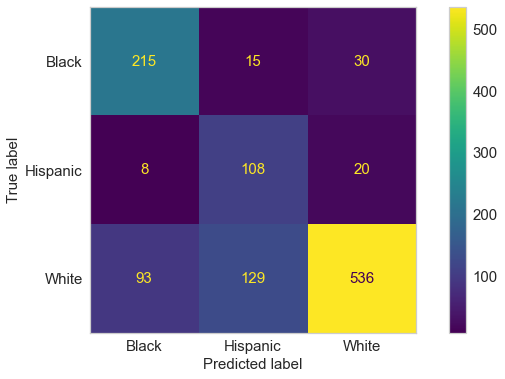

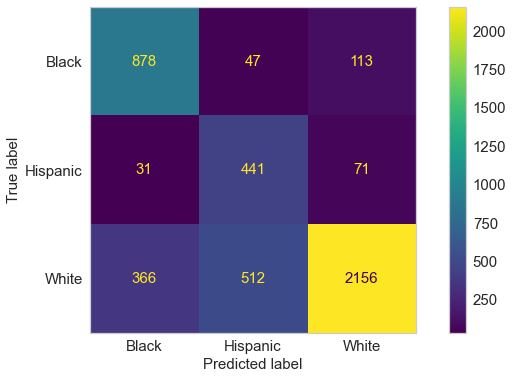

In [169]:
eval_metric(pipe_shap_model, X_train2, y_train2, X_test2, y_test2)

In [170]:
model = Pipeline(steps=operations_shap)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic          0.54
test_precision_Hispanic   0.42
test_recall_Hispanic      0.76
dtype: float64

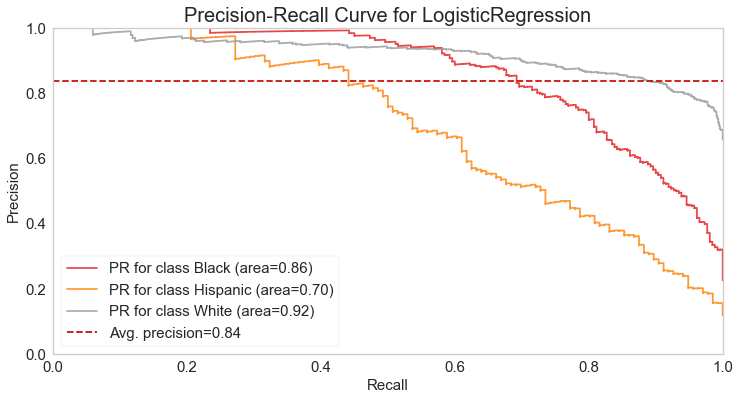

In [171]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations_shap)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

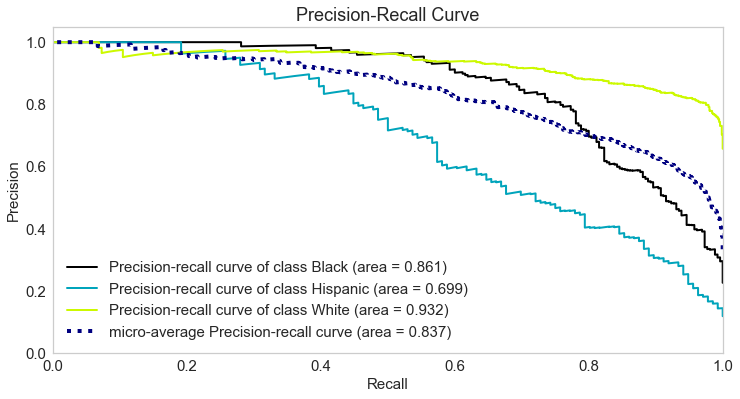

In [172]:
from scikitplot.metrics import plot_roc, precision_recall_curve
from scikitplot.metrics import plot_precision_recall


model = Pipeline(steps=operations_shap)

model.fit(X_train2, y_train2)

y_pred_proba = model.predict_proba(X_test2)
    
plot_precision_recall(y_test2, y_pred_proba)
plt.show()

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [173]:
column_trans_final = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse=False), cat), 
                                       remainder=MinMaxScaler())

operations_final = [("OneHotEncoder",column_trans_final),("log", LogisticRegression(class_weight='balanced',max_iter=10000,
                                                                          random_state=101))]

final_model = Pipeline(steps=operations_final)

In [174]:
final_model.fit(X, y)

Pipeline(steps=[('OneHotEncoder',
                 ColumnTransformer(remainder=MinMaxScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object'))])),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=101))])

In [175]:
X.describe()

abdominalextensiondepthsitting  acromialheight  acromionradialelength  \
count                         5769.00         5769.00                5769.00   
mean                           247.25         1408.63                 328.07   
std                             37.46           78.30                  20.44   
min                            155.00         1146.00                 249.00   
25%                            220.00         1353.00                 314.00   
50%                            243.00         1412.00                 328.00   
75%                            272.00         1464.00                 342.00   
max                            451.00         1683.00                 393.00   

       anklecircumference  axillaheight  balloffootcircumference  \
count             5769.00       5769.00                  5769.00   
mean               225.20       1301.90                   244.41   
std                 15.97         71.26                    16.80   
min                156.00       1062.00                   186.00   
25%                214.00       1252.00                   233.00   
50%                225.00       1304.00                   245.00   
75%                235.00       1351.00                   256.00   
max                293.00       1553.00                   306.00   

       balloffootlength  biacromialbreadth  bicepscircumferenceflexed  \
count           5769.00            5769.00                    5769.00   
mean             195.12             399.71                     341.66   
std               13.38              30.12                      41.27   
min              151.00             283.00                     216.00   
25%              186.00             377.00                     312.00   
50%              196.00             404.00                     342.00   
75%              205.00             422.00                     370.00   
max              245.00             489.00                     490.00   

       bicristalbreadth  bideltoidbreadth  bimalleolarbreadth  \
count           5769.00           5769.00             5769.00   
mean             274.90            491.45               72.34   
std               19.24             42.01                5.33   
min              197.00            357.00               55.00   
25%              262.00            461.00               68.00   
50%              274.00            493.00               73.00   
75%              288.00            520.00               76.00   
max              362.00            637.00               91.00   

       bitragionchinarc  bitragionsubmandibulararc  bizygomaticbreadth  \
count           5769.00                    5769.00             5769.00   
mean             324.96                     306.68              139.53   
std               17.05                      20.82                7.25   
min              267.00                     245.00              116.00   
25%              314.00                     292.00              134.00   
50%              326.00                     307.00              140.00   
75%              336.00                     321.00              145.00   
max              385.00                     390.00              166.00   

       buttockcircumference  buttockdepth  buttockheight  buttockkneelength  \
count               5769.00       5769.00        5769.00            5769.00   
mean                1022.06        242.23         872.11             610.45   
std                   75.95         26.41          54.06              33.12   
min                  737.00        168.00         656.00             479.00   
25%                  970.00        223.00         834.00             587.00   
50%                 1019.00        241.00         870.00             610.00   
75%                 1071.00        259.00         908.00             633.00   
max                 1341.00        349.00        1080.00             736.00   

       buttockpopliteallength  calfcircumference  

In [176]:
mean_human = X.describe(include="all").loc["mean"]
mean_human

abdominalextensiondepthsitting    247.25
acromialheight                   1408.63
acromionradialelength             328.07
anklecircumference                225.20
axillaheight                     1301.90
balloffootcircumference           244.41
balloffootlength                  195.12
biacromialbreadth                 399.71
bicepscircumferenceflexed         341.66
bicristalbreadth                  274.90
bideltoidbreadth                  491.45
bimalleolarbreadth                 72.34
bitragionchinarc                  324.96
bitragionsubmandibulararc         306.68
bizygomaticbreadth                139.53
buttockcircumference             1022.06
buttockdepth                      242.23
buttockheight                     872.11
buttockkneelength                 610.45
buttockpopliteallength            498.33
calfcircumference                 386.32
cervicaleheight                  1479.95
chestbreadth                      283.23
chestcircumference               1024.21
chestdepth      

In [177]:
mean_human["Gender"] = "Male"
mean_human["SubjectsBirthLocation"] = "California"
mean_human["WritingPreference"] = "Right hand"

In [178]:
pd.DataFrame(mean_human).T

abdominalextensiondepthsitting acromialheight acromionradialelength  \
mean                         247.25        1408.63                328.07   

     anklecircumference axillaheight balloffootcircumference balloffootlength  \
mean             225.20      1301.90                  244.41           195.12   

     biacromialbreadth bicepscircumferenceflexed bicristalbreadth  \
mean            399.71                    341.66           274.90   

     bideltoidbreadth bimalleolarbreadth bitragionchinarc  \
mean           491.45              72.34           324.96   

     bitragionsubmandibulararc bizygomaticbreadth buttockcircumference  \
mean                    306.68             139.53              1022.06   

     buttockdepth buttockheight buttockkneelength buttockpopliteallength  \
mean       242.23        872.11            610.45                 498.33   

     calfcircumference cervicaleheight chestbreadth chestcircumference  \
mean            386.32         1479.95       283.23            1024.21   

     chestdepth chestheight crotchheight crotchlengthomphalion  \
mean     252.32     1254.29       827.11                622.69   

     crotchlengthposterioromphalion earbreadth earlength earprotrusion  \
mean                         351.88      35.18     62.61         22.23   

     elbowrestheight eyeheightsitting footbreadthhorizontal footlength  \
mean          240.55           786.40                 98.92     263.51   

     forearmcenterofgriplength forearmcircumferenceflexed  \
mean                    339.46                     295.66   

     forearmforearmbreadth forearmhandlength functionalleglength handbreadth  \
mean                553.10            467.90             1104.35       85.10   

     handcircumference handlength headbreadth headcircumference headlength  \
mean            204.22     189.57      152.04            570.42     196.64   

     heelanklecircumference heelbreadth hipbreadth hipbreadthsitting  \
mean                 333.27       70.83     348.93            386.42   

     iliocristaleheight interpupillarybreadth interscyei interscyeii  \
mean            1042.15                632.53     412.77      433.02   

     kneeheightmidpatella kneeheightsitting lateralfemoralepicondyleheight  \
mean               476.67            541.38                         484.32   

     lateralmalleolusheight lowerthighcircumference mentonsellionlength  \
mean                  69.76                  406.94              119.60   

     neckcircumference neckcircumferencebase overheadfingertipreachsitting  \
mean            376.13                414.55                       1390.53   

     palmlength poplitealheight radialestylionlength shouldercircumference  \
mean     114.11          417.23               259.76               1131.21   

     shoulderelbowlength shoulderlength sittingheight sleevelengthspinewrist  \
mean              354.81         145.20        898.59                 868.36   

     sleeveoutseam    span stature suprasternaleheight tenthribheight  \
mean        578.01 1766.95 1716.94             1405.39        1101.63   

     thighcircumference thighclearance thumbtipreach tibialheight  \
mean             623.58         176.70        791.04       459.39   

     tragiontopofhead trochanterionheight verticaltrunkcircumferenceusa  \
mean           129.58              884.66                       1632.47   

     waistbacklength waistbreadth waistcircumference waistdepth  \
mean          460.99       318.41             916.82     230.46   

     waistfrontlengthsitting waistheightomphalion weightkg wristcircumference  \
mean                  377.35              1033.59   800.98             169.31   

     wristheight Gender SubjectsBirthLocation   Age WritingPreference  
mean      831.33   Male            California 29.78        Right hand

In [179]:
final_model.predict(pd.DataFrame(mean_human).T)

array(['Hispanic'], dtype=object)

In [180]:
y[201]

'Hispanic'

In [181]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [182]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.5969247015038696

In [183]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.577953197669846

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___